In [1]:
pip install gym

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

## Slippery

In [2]:
env = gym.make("FrozenLake-v1", is_slippery=True)
print(f"State Space: {env.observation_space.n}")
print(f"Action Space: {env.action_space.n}")

State Space: 16
Action Space: 4


In [3]:
Q = np.zeros((env.observation_space.n, env.action_space.n))

alpha = 0.1
gamma = 0.99
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.01
num_episodes = 1000

In [4]:
rewards = []
st = time()
for episode in range(num_episodes):
    reset_output = env.reset()
    if isinstance(reset_output, tuple):
        state = reset_output[0]
    else:
        state = reset_output

    total_reward = 0
    done = False

    while not done:
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        next_reset_output = env.step(action)

        if len(next_reset_output) == 5:
            next_state, reward, done, truncated, _ = next_reset_output
            done = done or truncated
        else:
            next_state, reward, done, _ = next_reset_output

        best_next_action = np.argmax(Q[next_state])
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, best_next_action] - Q[state, action])

        state = next_state
        total_reward += reward

    rewards.append(total_reward)
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
et = time()
print("Training completed!")
print("Time Taken: ",et-st)

C:\Users\YASH PATEL\AppData\Roaming\Python\Python311\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Training completed!
Time Taken:  0.2581939697265625


In [5]:
total_rewards = 0
episodes_test = 100
st = time()
for _ in range(episodes_test):
    reset_output = env.reset()
    if isinstance(reset_output, tuple):
        state = reset_output[0]
    else:
        state = reset_output

    done = False
    while not done:
        action = np.argmax(Q[state])
        next_reset_output = env.step(action)

        if len(next_reset_output) == 5:
            next_state, reward, done, truncated, _ = next_reset_output
            done = done or truncated
        else:
            next_state, reward, done, _ = next_reset_output

        total_rewards += reward
        state = next_state
et = time()

average_reward = total_rewards / episodes_test
print(f"Average Reward over {episodes_test} episodes: {average_reward}")

print("Time Taken: ",et-st)

Average Reward over 100 episodes: 0.78
Time Taken:  0.041922569274902344


In [6]:
alpha_values = [0.1, 0.3, 0.5]
gamma_values = [0.9, 0.95, 0.99]
epsilon_decay_values = [0.99, 0.995, 0.999]

In [ ]:
results = {}

st = time()
for alpha in alpha_values:
    for gamma in gamma_values:
        for epsilon_decay in epsilon_decay_values:
            Q = np.zeros((env.observation_space.n, env.action_space.n))
            epsilon = 1.0

            rewards_per_episode = []

            for episode in range(num_episodes):
                reset_output = env.reset()
                if isinstance(reset_output, tuple):
                    state = reset_output[0]
                else:
                    state = reset_output

                total_reward = 0
                done = False

                while not done:
                    if np.random.rand() < epsilon:
                        action = env.action_space.sample()
                    else:
                        action = np.argmax(Q[state])

                    next_reset_output = env.step(action)

                    if len(next_reset_output) == 5:
                        next_state, reward, done, truncated, _ = next_reset_output
                        done = done or truncated
                    else:
                        next_state, reward, done, _ = next_reset_output

                    best_next_action = np.argmax(Q[next_state])
                    Q[state, action] = Q[state, action] + alpha * (
                        reward + gamma * Q[next_state, best_next_action] - Q[state, action])

                    state = next_state
                    total_reward += reward

                rewards_per_episode.append(total_reward)

                epsilon = max(min_epsilon, epsilon * epsilon_decay)

            avg_reward_last_100 = np.mean(rewards_per_episode[-100:])
            results[(alpha, gamma, epsilon_decay)] = avg_reward_last_100
            print(f"Alpha: {alpha}, Gamma: {gamma}, Epsilon Decay: {epsilon_decay} -> Average Reward (last 100 episodes): {avg_reward_last_100}")
et = time()
print("Time Taken: ",et-st)

Alpha: 0.1, Gamma: 0.9, Epsilon Decay: 0.99 -> Average Reward (last 100 episodes): 0.0
Alpha: 0.1, Gamma: 0.9, Epsilon Decay: 0.995 -> Average Reward (last 100 episodes): 0.0
Alpha: 0.1, Gamma: 0.9, Epsilon Decay: 0.999 -> Average Reward (last 100 episodes): 0.0


In [8]:
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
for params, avg_reward in sorted_results:
    print(f"Parameters (Alpha: {params[0]}, Gamma: {params[1]}, Epsilon Decay: {params[2]}) -> Average Reward: {avg_reward}")

Parameters (Alpha: 0.1, Gamma: 0.95, Epsilon Decay: 0.995) -> Average Reward: 0.66
Parameters (Alpha: 0.5, Gamma: 0.95, Epsilon Decay: 0.99) -> Average Reward: 0.65
Parameters (Alpha: 0.5, Gamma: 0.9, Epsilon Decay: 0.995) -> Average Reward: 0.54
Parameters (Alpha: 0.3, Gamma: 0.9, Epsilon Decay: 0.995) -> Average Reward: 0.52
Parameters (Alpha: 0.3, Gamma: 0.99, Epsilon Decay: 0.99) -> Average Reward: 0.5
Parameters (Alpha: 0.5, Gamma: 0.95, Epsilon Decay: 0.995) -> Average Reward: 0.5
Parameters (Alpha: 0.3, Gamma: 0.9, Epsilon Decay: 0.99) -> Average Reward: 0.49
Parameters (Alpha: 0.3, Gamma: 0.95, Epsilon Decay: 0.995) -> Average Reward: 0.47
Parameters (Alpha: 0.1, Gamma: 0.9, Epsilon Decay: 0.995) -> Average Reward: 0.42
Parameters (Alpha: 0.1, Gamma: 0.99, Epsilon Decay: 0.995) -> Average Reward: 0.32
Parameters (Alpha: 0.3, Gamma: 0.95, Epsilon Decay: 0.999) -> Average Reward: 0.12
Parameters (Alpha: 0.3, Gamma: 0.9, Epsilon Decay: 0.999) -> Average Reward: 0.1
Parameters (Alp

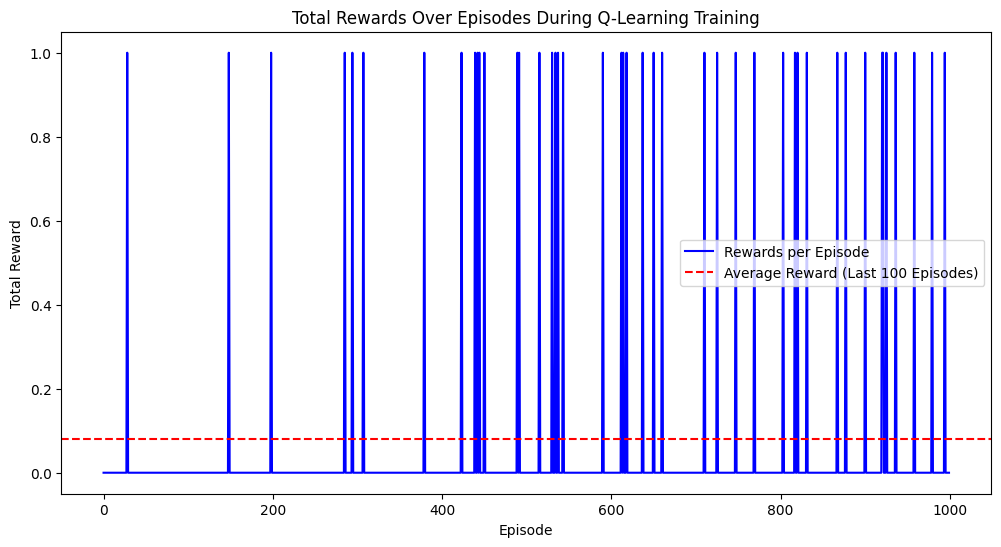

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(rewards_per_episode, color='blue', label='Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Rewards Over Episodes During Q-Learning Training')
plt.axhline(y=np.mean(rewards_per_episode[-100:]), color='r', linestyle='--', label='Average Reward (Last 100 Episodes)')
plt.legend()
plt.show()


## Non Slippery

In [11]:
env = gym.make("FrozenLake-v1", is_slippery=False)

print(f"State Space: {env.observation_space.n}")
print(f"Action Space: {env.action_space.n}")

State Space: 16
Action Space: 4


In [12]:
Q = np.zeros((env.observation_space.n, env.action_space.n))

alpha = 0.1
gamma = 0.99
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.01
num_episodes = 1000

In [13]:
rewards = []
st = time()
for episode in range(num_episodes):
    reset_output = env.reset()
    if isinstance(reset_output, tuple):
        state = reset_output[0]
    else:
        state = reset_output

    total_reward = 0
    done = False

    while not done:
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        next_reset_output = env.step(action)

        if len(next_reset_output) == 5:
            next_state, reward, done, truncated, _ = next_reset_output
            done = done or truncated
        else:
            next_state, reward, done, _ = next_reset_output

        best_next_action = np.argmax(Q[next_state])
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, best_next_action] - Q[state, action])

        state = next_state
        total_reward += reward

    rewards.append(total_reward)
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
et = time()
print("Training completed!")
print("Time Taken: ",et-st)

C:\Users\YASH PATEL\AppData\Roaming\Python\Python311\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Training completed!
Time Taken:  0.6328427791595459


In [14]:
total_rewards = 0
episodes_test = 100
st = time()
for _ in range(episodes_test):
    reset_output = env.reset()
    if isinstance(reset_output, tuple):
        state = reset_output[0]
    else:
        state = reset_output

    done = False
    while not done:
        action = np.argmax(Q[state])
        next_reset_output = env.step(action)

        if len(next_reset_output) == 5:
            next_state, reward, done, truncated, _ = next_reset_output
            done = done or truncated
        else:
            next_state, reward, done, _ = next_reset_output

        total_rewards += reward
        state = next_state
et = time()

average_reward = total_rewards / episodes_test
print(f"Average Reward over {episodes_test} episodes: {average_reward}")

print("Time Taken: ",et-st)

Average Reward over 100 episodes: 0.0
Time Taken:  0.07196712493896484


In [15]:
results = {}

st = time()
for alpha in alpha_values:
    for gamma in gamma_values:
        for epsilon_decay in epsilon_decay_values:
            Q = np.zeros((env.observation_space.n, env.action_space.n))
            epsilon = 1.0

            rewards_per_episode = []

            for episode in range(num_episodes):
                reset_output = env.reset()
                if isinstance(reset_output, tuple):
                    state = reset_output[0]
                else:
                    state = reset_output

                total_reward = 0
                done = False

                while not done:
                    if np.random.rand() < epsilon:
                        action = env.action_space.sample()
                    else:
                        action = np.argmax(Q[state])

                    next_reset_output = env.step(action)

                    if len(next_reset_output) == 5:
                        next_state, reward, done, truncated, _ = next_reset_output
                        done = done or truncated
                    else:
                        next_state, reward, done, _ = next_reset_output

                    best_next_action = np.argmax(Q[next_state])
                    Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, best_next_action] - Q[state, action])

                    state = next_state
                    total_reward += reward

                rewards_per_episode.append(total_reward)

                epsilon = max(min_epsilon, epsilon * epsilon_decay)

            avg_reward_last_100 = np.mean(rewards_per_episode[-100:])
            results[(alpha, gamma, epsilon_decay)] = avg_reward_last_100
            print(f"Alpha: {alpha}, Gamma: {gamma}, Epsilon Decay: {epsilon_decay} -> Average Reward (last 100 episodes): {avg_reward_last_100}")
et = time()
print("Time Taken: ",et-st)

Alpha: 0.1, Gamma: 0.9, Epsilon Decay: 0.99 -> Average Reward (last 100 episodes): 0.0
Alpha: 0.1, Gamma: 0.9, Epsilon Decay: 0.995 -> Average Reward (last 100 episodes): 0.0
Alpha: 0.1, Gamma: 0.9, Epsilon Decay: 0.999 -> Average Reward (last 100 episodes): 0.55
Alpha: 0.1, Gamma: 0.95, Epsilon Decay: 0.99 -> Average Reward (last 100 episodes): 0.0
Alpha: 0.1, Gamma: 0.95, Epsilon Decay: 0.995 -> Average Reward (last 100 episodes): 0.98
Alpha: 0.1, Gamma: 0.95, Epsilon Decay: 0.999 -> Average Reward (last 100 episodes): 0.55
Alpha: 0.1, Gamma: 0.99, Epsilon Decay: 0.99 -> Average Reward (last 100 episodes): 0.0
Alpha: 0.1, Gamma: 0.99, Epsilon Decay: 0.995 -> Average Reward (last 100 episodes): 0.0
Alpha: 0.1, Gamma: 0.99, Epsilon Decay: 0.999 -> Average Reward (last 100 episodes): 0.5
Alpha: 0.3, Gamma: 0.9, Epsilon Decay: 0.99 -> Average Reward (last 100 episodes): 0.0
Alpha: 0.3, Gamma: 0.9, Epsilon Decay: 0.995 -> Average Reward (last 100 episodes): 0.0
Alpha: 0.3, Gamma: 0.9, Eps

In [16]:
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
for params, avg_reward in sorted_results:
    print(f"Parameters (Alpha: {params[0]}, Gamma: {params[1]}, Epsilon Decay: {params[2]}) -> Average Reward: {avg_reward}")

Parameters (Alpha: 0.3, Gamma: 0.99, Epsilon Decay: 0.99) -> Average Reward: 0.99
Parameters (Alpha: 0.5, Gamma: 0.95, Epsilon Decay: 0.99) -> Average Reward: 0.99
Parameters (Alpha: 0.1, Gamma: 0.95, Epsilon Decay: 0.995) -> Average Reward: 0.98
Parameters (Alpha: 0.3, Gamma: 0.99, Epsilon Decay: 0.999) -> Average Reward: 0.68
Parameters (Alpha: 0.5, Gamma: 0.99, Epsilon Decay: 0.999) -> Average Reward: 0.65
Parameters (Alpha: 0.5, Gamma: 0.9, Epsilon Decay: 0.999) -> Average Reward: 0.6
Parameters (Alpha: 0.5, Gamma: 0.95, Epsilon Decay: 0.999) -> Average Reward: 0.6
Parameters (Alpha: 0.3, Gamma: 0.9, Epsilon Decay: 0.999) -> Average Reward: 0.56
Parameters (Alpha: 0.1, Gamma: 0.9, Epsilon Decay: 0.999) -> Average Reward: 0.55
Parameters (Alpha: 0.1, Gamma: 0.95, Epsilon Decay: 0.999) -> Average Reward: 0.55
Parameters (Alpha: 0.1, Gamma: 0.99, Epsilon Decay: 0.999) -> Average Reward: 0.5
Parameters (Alpha: 0.3, Gamma: 0.95, Epsilon Decay: 0.999) -> Average Reward: 0.45
Parameters (

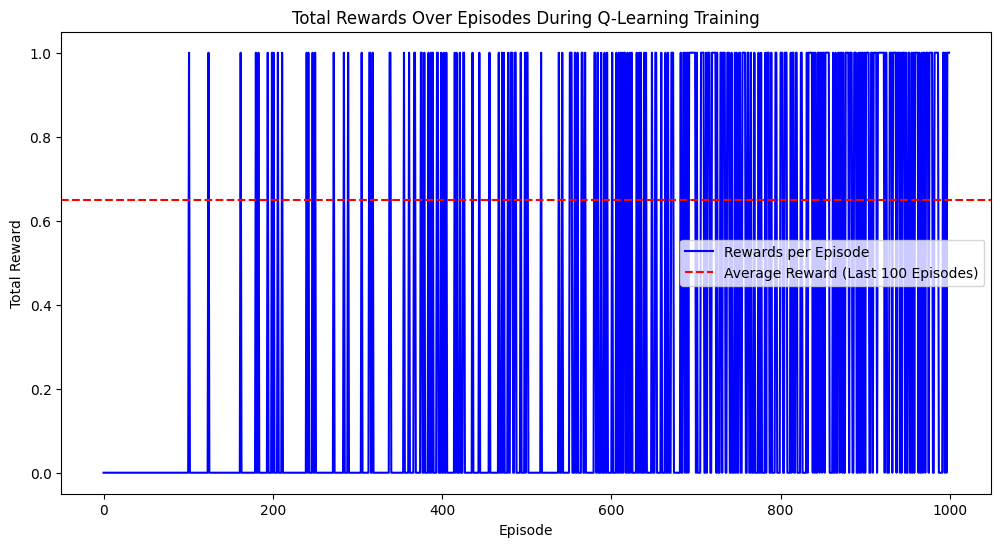

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(rewards_per_episode, color='blue', label='Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Rewards Over Episodes During Q-Learning Training')
plt.axhline(y=np.mean(rewards_per_episode[-100:]), color='r', linestyle='--', label='Average Reward (Last 100 Episodes)')
plt.legend()
plt.show()
